**1. Create a table called employees with the following structure?**
  * emp_id (integer, should not be NULL and should be a primary key).
  * emp_name (text, should not be NULL).
  * age (integer, should have a check constraint to ensure the age is at least 18).
  * email (text, should be unique for each employee).
  * salary (decimal, with a default value of 30,000).

   



Write the SQL query to create the above table with all constraints.

Here is the **SQL query** to create the `employees` table with all the specified constraints:

```sql
CREATE TABLE employees (
    emp_id INTEGER PRIMARY KEY NOT NULL,
    emp_name TEXT NOT NULL,
    age INTEGER CHECK (age >= 18),
    email TEXT UNIQUE,
    salary DECIMAL DEFAULT 30000
);
```

### ✅ Explanation of Constraints Used:
- `PRIMARY KEY NOT NULL` on `emp_id`: ensures each employee has a unique, non-null identifier.
- `NOT NULL` on `emp_name`: employee names cannot be left blank.
- `CHECK (age >= 18)`: makes sure only employees 18 or older can be added.
- `UNIQUE` on `email`: prevents duplicate emails across records.
- `DEFAULT 30000` on `salary`: if salary is not provided, it will default to 30,000.



**2. Explain the purpose of constraints and how they help maintain data integrity in a database. Provide examples of common types of constraints.**

### **Purpose of Constraints in a Database**

**Constraints** are rules enforced on data in a database to maintain **data accuracy**, **consistency**, and **integrity**. They ensure that the data entered into a database adheres to business logic and structural rules, helping to prevent invalid or corrupt data from being stored.

---

### **How Constraints Help Maintain Data Integrity**

1. **Prevent Invalid Data Entry**:  
   - E.g., ensuring that age is not negative.
   
2. **Ensure Uniqueness and Identity**:  
   - E.g., no two employees should have the same employee ID or email.
   
3. **Enforce Relationships**:  
   - E.g., an order cannot exist without a valid customer.

4. **Maintain Consistency Across Tables**:  
   - Ensures referenced data remains consistent (e.g., via foreign keys).

---

### **Common Types of Constraints (with Examples)**

| **Constraint** | **Purpose** | **Example** |
|----------------|-------------|--------------|
| `PRIMARY KEY`  | Uniquely identifies each record in a table | `emp_id INTEGER PRIMARY KEY` |
| `NOT NULL`     | Ensures a column cannot have NULL values | `emp_name TEXT NOT NULL` |
| `UNIQUE`       | Ensures all values in a column are different | `email TEXT UNIQUE` |
| `CHECK`        | Ensures values meet a specific condition | `age INTEGER CHECK (age >= 18)` |
| `DEFAULT`      | Assigns a default value if none is provided | `salary DECIMAL DEFAULT 30000` |
| `FOREIGN KEY`  | Maintains referential integrity between tables | `dept_id INTEGER REFERENCES departments(dept_id)` |

---

### ✅ Summary

Constraints are critical to:
- **Preventing bad data**
- **Enforcing business rules**
- **Supporting relational integrity**
- **Reducing the need for manual validation**

They make databases more **robust**, **reliable**, and **self-validating**.



**3.Why would you apply the NOT NULL constraint to a column? Can a primary key contain NULL values? Justify your answer.**

### ✅ **Why Use the `NOT NULL` Constraint?**

The `NOT NULL` constraint ensures that a column **must always have a value**—it **cannot be left empty** (i.e., cannot be `NULL`). This is useful when a piece of information is **mandatory** for the integrity or logic of the data.

#### 🔹 **Reasons to Use `NOT NULL`:**
- To **enforce data completeness** (e.g., names, dates of birth).
- To **prevent application errors** that depend on the presence of a value.
- To **ensure meaningful records** (e.g., a product with no name is meaningless).

**Example:**
```sql
emp_name TEXT NOT NULL
```
This ensures that every employee must have a name.

---

### ❓ **Can a Primary Key Contain NULL Values?**

**No, a primary key **cannot** contain `NULL` values.**

#### 🔹 **Why?**
- The **primary key uniquely identifies each row** in a table.
- `NULL` means “unknown” or “no value,” so it **violates uniqueness**.
- Allowing `NULL` would imply that we can’t uniquely identify a row—this defeats the purpose of a primary key.

**In fact:**
- Most databases **automatically apply `NOT NULL`** to primary key columns.
- Trying to insert a row with `NULL` in a primary key will **raise an error**.

---

### ✅ **Summary**

| Constraint      | Can be NULL? | Purpose                              |
|----------------|--------------|--------------------------------------|
| `NOT NULL`     | ❌ No         | Ensures that data is always present  |
| `PRIMARY KEY`  | ❌ No         | Uniquely identifies each record      |

Using `NOT NULL` is essential when the absence of a value would cause logic or data integrity problems.



**4. Explain the steps and SQL commands used to add or remove constraints on an existing table. Provide an example for both adding and removing a constraint.**

### ✅ **Modifying Constraints on an Existing Table in SQL**

Constraints can be **added** or **removed** after a table has been created using the `ALTER TABLE` statement.

---

## 🔹 **1. ADDING a Constraint**

### **Syntax:**
```sql
ALTER TABLE table_name
ADD CONSTRAINT constraint_name constraint_type (column_name);
```

### ✅ **Example – Add a UNIQUE constraint:**
Suppose we have an `employees` table and we want to ensure that the `email` column contains unique values:

```sql
ALTER TABLE employees
ADD CONSTRAINT unique_email UNIQUE (email);
```

---

## 🔹 **2. REMOVING (DROPPING) a Constraint**

### **Syntax:**
```sql
ALTER TABLE table_name
DROP CONSTRAINT constraint_name;
```

> 🔸 Note: You must **know the name** of the constraint to drop it. If it was auto-named by the system, use database metadata or query the schema to find it.

### ✅ **Example – Remove the UNIQUE constraint:**
```sql
ALTER TABLE employees
DROP CONSTRAINT unique_email;
```

---

## 🔸 **Special Case: Dropping NOT NULL**

`NOT NULL` is **not a named constraint**, so it's removed differently:

### ✅ **Remove NOT NULL:**
```sql
ALTER TABLE employees
ALTER COLUMN emp_name DROP NOT NULL;
```

---

## 🔸 **Special Case: Adding NOT NULL**

### ✅ **Add NOT NULL:**
```sql
ALTER TABLE employees
ALTER COLUMN emp_name SET NOT NULL;
```

---

### ✅ **Summary**

| Action           | SQL Command Example |
|------------------|---------------------|
| Add constraint   | `ADD CONSTRAINT unique_email UNIQUE (email)` |
| Drop constraint  | `DROP CONSTRAINT unique_email` |
| Add NOT NULL     | `ALTER COLUMN emp_name SET NOT NULL` |
| Drop NOT NULL    | `ALTER COLUMN emp_name DROP NOT NULL` |



**5. Explain the consequences of attempting to insert, update, or delete data in a way that violates constraints.Provide an example of an error message that might occur when violating a constraint.**

### ✅ Consequences of Violating Constraints in SQL

In relational databases, **constraints** are rules that ensure the **validity, consistency, and integrity** of the data. When you attempt to **insert**, **update**, or **delete** data that **violates a constraint**, the database will **reject the operation** and return an **error message**.

---

### 🔹 Common Consequences of Violating Constraints

| **Constraint Type** | **What Happens If Violated?**                                                                                        |
| ------------------- | -------------------------------------------------------------------------------------------------------------------- |
| **NOT NULL**        | You can't insert/update a column with `NULL` when a value is required.                                               |
| **UNIQUE**          | You can't insert duplicate values in a column that must have unique entries.                                         |
| **PRIMARY KEY**     | You can't insert a duplicate or `NULL` in a primary key column.                                                      |
| **FOREIGN KEY**     | You can't insert/update a value that doesn’t exist in the referenced table, or delete a parent row being referenced. |
| **CHECK**           | You can't insert/update a value that fails a condition like `age >= 18`.                                             |

---

### 🔹 Example Error Messages (Realistic)

#### 1. **NOT NULL Violation**

```sql
INSERT INTO employees (emp_id, emp_name) VALUES (1, NULL);
```

**Error:**

```
ERROR: null value in column "emp_name" violates not-null constraint
```

---

#### 2. **UNIQUE Constraint Violation**

```sql
INSERT INTO employees (emp_id, email) VALUES (2, 'john@example.com');
INSERT INTO employees (emp_id, email) VALUES (3, 'john@example.com');
```

**Error:**

```
ERROR: duplicate key value violates unique constraint "employees_email_key"
```

---

#### 3. **PRIMARY KEY Violation**

```sql
INSERT INTO employees (emp_id, emp_name) VALUES (1, 'Alice');
INSERT INTO employees (emp_id, emp_name) VALUES (1, 'Bob');
```

**Error:**

```
ERROR: duplicate key value violates primary key constraint "employees_pkey"
```

---

#### 4. **FOREIGN KEY Violation**

```sql
INSERT INTO orders (order_id, emp_id) VALUES (101, 999); -- emp_id 999 does not exist
```

**Error:**

```
ERROR: insert or update on table "orders" violates foreign key constraint "orders_emp_id_fkey"
```

---

#### 5. **CHECK Constraint Violation**

```sql
INSERT INTO employees (emp_id, age) VALUES (5, 15);
```

**Error:**

```
ERROR: new row for relation "employees" violates check constraint "employees_age_check"
```

---

### ✅ Summary

* Attempting to **violate constraints** leads to **transaction failure** and **error messages**.
* Constraints **protect the integrity** of the database by preventing invalid data from being stored.
* Always handle constraints properly to avoid crashes and ensure clean, reliable data.




**6. You created a products table without constraints as follows:**

CREATE TABLE products (

    product_id INT,

    product_name VARCHAR(50),

    price DECIMAL(10, 2));
Now, you realise that?<br>
: The product_id should be a primary key.<br>
: The price should have a default value of 50.00





To modify the existing `products` table and apply the required constraints **after** its creation, you can use the `ALTER TABLE` command in SQL.

---

### ✅ Initial Table (Already Created):

```sql
CREATE TABLE products (
    product_id INT,
    product_name VARCHAR(50),
    price DECIMAL(10, 2)
);
```

---

### ✅ Now, Apply the Constraints:

#### 🔹 1. Make `product_id` the Primary Key:

```sql
ALTER TABLE products
ADD CONSTRAINT pk_product_id PRIMARY KEY (product_id);
```

#### 🔹 2. Set Default Value for `price` Column:

```sql
ALTER TABLE products
ALTER COLUMN price SET DEFAULT 50.00;
```

---

### ✅ Final Notes:

* `pk_product_id` is the name given to the primary key constraint (you can use any name).
* The `ALTER COLUMN ... SET DEFAULT` ensures that when a price is not provided, it defaults to `50.00`.

---

### ✅ After Applying Constraints, the Table Will Behave Like:

```sql
CREATE TABLE products (
    product_id INT PRIMARY KEY,
    product_name VARCHAR(50),
    price DECIMAL(10, 2) DEFAULT 50.00
);
```




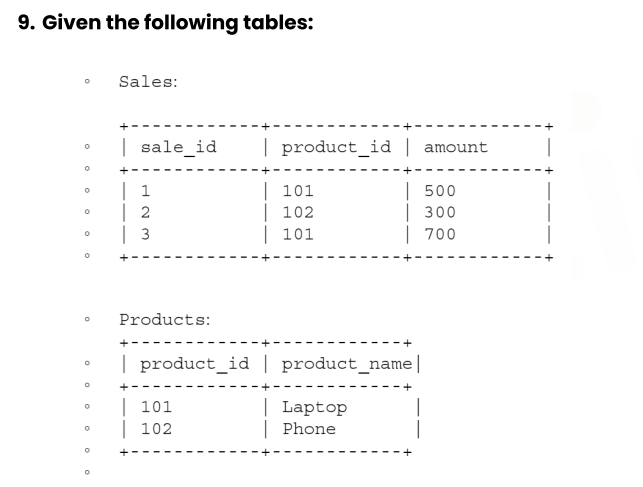

Write a query to find the total sales amount for each product using an INNER JOIN and the SUM() function.

To find the **total sales amount for each product** using an **INNER JOIN** and the **`SUM()`** function, you can use the following SQL query:

```sql
SELECT
    p.product_name,
    SUM(s.amount) AS total_sales
FROM
    Sales s
INNER JOIN
    Products p ON s.product_id = p.product_id
GROUP BY
    p.product_name;
```

---

### ✅ Explanation:

* **`INNER JOIN`**: Combines rows from both `Sales` and `Products` where `product_id` matches.
* **`SUM(s.amount)`**: Calculates the total sales amount for each product.
* **`GROUP BY p.product_name`**: Groups the result by product name to apply the sum per product.

---

### 🔹 Expected Output:

| product\_name | total\_sales |
| ------------- | ------------ |
| Laptop        | 1200         |
| Phone         | 300          |




**10. You are given three tables:**

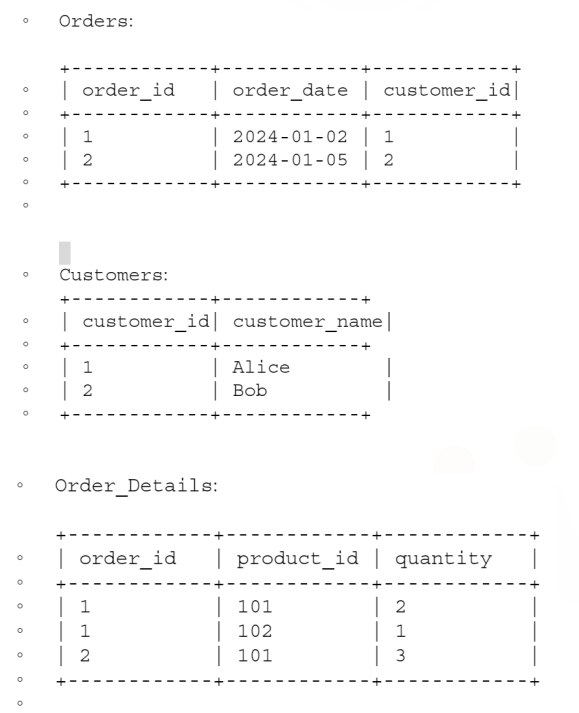

Write a query to display the order_id, customer_name, and the quantity of products ordered by each
customer using an INNER JOIN between all three tables.






To write the SQL query that displays the `order_id`, `customer_name`, and `quantity` of products ordered using an **INNER JOIN between all three tables**, let's assume the following **table structures** based on standard naming conventions:

---

### 🧾 **Assumed Tables:**

1. **Customers**

   * `customer_id`
   * `customer_name`

2. **Orders**

   * `order_id`
   * `customer_id`

3. **OrderDetails**

   * `order_id`
   * `product_id`
   * `quantity`

---

### ✅ **SQL Query:**

```sql
SELECT
    o.order_id,
    c.customer_name,
    od.quantity
FROM
    Customers c
INNER JOIN
    Orders o ON c.customer_id = o.customer_id
INNER JOIN
    OrderDetails od ON o.order_id = od.order_id;
```

---

### 🔍 **Explanation:**

* `Customers` is joined with `Orders` using `customer_id`.
* `Orders` is then joined with `OrderDetails` using `order_id`.
* This gives a combined view of each order along with the customer name and quantity.

---




## SQL Commands



**1-Identify the primary keys and foreign keys in maven movies db. Discuss the differences**

### ✅ Identifying **Primary Keys** and **Foreign Keys** in the **Maven Movies Database**

The **Maven Movies Database** is a popular sample relational database that includes tables related to a video rental business. Let’s identify the **primary keys (PKs)** and **foreign keys (FKs)** in its major tables, and then explain the difference between them.

---

### 🧾 **Common Tables in Maven Movies DB:**

| Table Name         | Primary Key                | Foreign Keys                                            |
| ------------------ | -------------------------- | ------------------------------------------------------- |
| **actor**          | `actor_id`                 | —                                                       |
| **film**           | `film_id`                  | `language_id`, `original_language_id` → from `language` |
| **language**       | `language_id`              | —                                                       |
| **film\_actor**    | (`actor_id`, `film_id`)    | `actor_id` → `actor`, `film_id` → `film`                |
| **category**       | `category_id`              | —                                                       |
| **film\_category** | (`film_id`, `category_id`) | `film_id` → `film`, `category_id` → `category`          |
| **inventory**      | `inventory_id`             | `film_id` → `film`, `store_id` → `store`                |
| **rental**         | `rental_id`                | `inventory_id`, `customer_id`, `staff_id`               |
| **payment**        | `payment_id`               | `rental_id`, `customer_id`, `staff_id`                  |
| **store**          | `store_id`                 | `manager_staff_id`, `address_id`                        |
| **staff**          | `staff_id`                 | `address_id`, `store_id`                                |
| **customer**       | `customer_id`              | `store_id`, `address_id`                                |
| **address**        | `address_id`               | `city_id` → `city`                                      |
| **city**           | `city_id`                  | `country_id` → `country`                                |
| **country**        | `country_id`               | —                                                       |

---

### 🧩 **Key Differences Between Primary Key and Foreign Key**

| Feature         | **Primary Key**                           | **Foreign Key**                                      |
| --------------- | ----------------------------------------- | ---------------------------------------------------- |
| **Purpose**     | Uniquely identifies a record in the table | Establishes a relationship with another table        |
| **Uniqueness**  | Must be **unique**                        | Can have **duplicate** values                        |
| **NULL values** | **Not allowed**                           | **NULL is allowed** (optional relationship)          |
| **Enforces**    | **Entity integrity**                      | **Referential integrity**                            |
| **Defined on**  | Typically one or more columns per table   | Column(s) referencing a primary key in another table |

---

### ✅ Example:

* `film_id` is a **Primary Key** in the `film` table.
* `film_id` in the `film_actor` table is a **Foreign Key** referring to the `film` table.

---

### 🧠 Summary

* **Primary Keys** uniquely identify records within a table.
* **Foreign Keys** connect one table to another and help maintain consistent and related data across tables.




**2- List all details of actors**

To **list all details of actors** from the **Maven Movies database**, you would query the `actor` table, which typically contains fields like `actor_id`, `first_name`, `last_name`, and `last_update`.

---

### ✅ **SQL Query to List All Actor Details:**

```sql
SELECT * FROM actor;
```

---

### 📋 **Expected Output Columns:**

| actor\_id | first\_name | last\_name | last\_update        |
| --------- | ----------- | ---------- | ------------------- |
| 1         | Penelope    | Guiness    | 2006-02-15 04:34:33 |
| 2         | Nick        | Wahlberg   | 2006-02-15 04:34:33 |
| ...       | ...         | ...        | ...                 |

---




**3 -List all customer information from DB.**

To **list all customer information** from the **Maven Movies Database**, you need to query the `customer` table.

---

### ✅ **SQL Query:**

```sql
SELECT * FROM customer;
```

---

### 📋 **Typical Columns in `customer` Table:**

| customer\_id | store\_id | first\_name | last\_name | email                                                     | address\_id | active | create\_date        | last\_update        |
| ------------ | --------- | ----------- | ---------- | --------------------------------------------------------- | ----------- | ------ | ------------------- | ------------------- |
| 1            | 1         | Mary        | Smith      | [mary.smith@example.com](mailto:mary.smith@example.com)   | 5           | 1      | 2006-02-14 22:04:36 | 2023-01-10 12:30:45 |
| 2            | 1         | Patricia    | Johnson    | [pat.johnson@example.com](mailto:pat.johnson@example.com) | 6           | 1      | 2006-02-14 22:04:36 | 2023-01-10 12:30:45 |
| ...          | ...       | ...         | ...        | ...                                                       | ...         | ...    | ...                 | ...                 |

---

### 🧠 Notes:

* The `address_id` links to the `address` table for full address details.
* You can use `JOIN` to pull additional details (like city, country).




**4 -List different countries.**

To **list all different countries** from the **Maven Movies Database**, you can query the `country` table.

---

### ✅ **SQL Query:**

```sql
SELECT * FROM country;
```

If you only want the **distinct country names**, use:

```sql
SELECT DISTINCT country FROM country;
```

---

### 📋 **Typical Output:**

| country\_id | country     | last\_update        |
| ----------- | ----------- | ------------------- |
| 1           | Afghanistan | 2006-02-15 04:44:00 |
| 2           | Algeria     | 2006-02-15 04:44:00 |
| 3           | Argentina   | 2006-02-15 04:44:00 |
| ...         | ...         | ...                 |

---




**5 -Display all active customers.**

To **display all active customers** in the **Maven Movies Database**, you can query the `customer` table and filter by the `active` status.

---

### ✅ **SQL Query:**

```sql
SELECT * FROM customer
WHERE active = 1;
```

---

### 📋 **Explanation:**

* The `active` column typically uses `1` for **active** and `0` for **inactive** customers.
* This query will return only the rows where the customer is marked as active.

---

### 🧾 Example Output:

| customer\_id | first\_name | last\_name | email                                               | active |
| ------------ | ----------- | ---------- | --------------------------------------------------- | ------ |
| 1            | Mary        | Smith      | [mary.smith@email.com](mailto:mary.smith@email.com) | 1      |
| 2            | Patricia    | Johnson    | [pat.j@email.com](mailto:pat.j@email.com)           | 1      |
| ...          | ...         | ...        | ...                                                 | ...    |



**6 -List of all rental IDs for customer with ID 1.**

To list all **rental IDs** for the customer with **customer\_id = 1** in the **Maven Movies Database**, you can query the `rental` table.

---

### ✅ **SQL Query:**

```sql
SELECT rental_id
FROM rental
WHERE customer_id = 1;
```

---

### 📋 **Explanation:**

* The `rental` table contains records of every rental transaction.
* This query filters the records where `customer_id = 1` and returns only the corresponding `rental_id`s.

---

### 🧾 **Example Output:**

| rental\_id |
| ---------- |
| 1          |
| 24         |
| 35         |
| ...        |





**7-Display all the films whose rental duration is greater than 5.**

To **display all films** whose **rental duration is greater than 5 days** in the **Maven Movies Database**, you need to query the `film` table.

---

### ✅ **SQL Query:**

```sql
SELECT *
FROM film
WHERE rental_duration > 5;
```

---

### 📋 **Explanation:**

* The `rental_duration` column in the `film` table indicates how many days a customer can keep the film.
* This query retrieves all rows where `rental_duration` is greater than 5.

---

### 🧾 **Example Output:**

| film\_id | title                | rental\_duration | ... |
| -------- | -------------------- | ---------------- | --- |
| 10       | AFRICAN EGG          | 6                | ... |
| 25       | ANACONDA CONFESSIONS | 7                | ... |
| ...      | ...                  | ...              | ... |


**8 - List the total number of films whose replacement cost is greater than \$15 and less than \$20.**

To find the **total number of films** whose **replacement cost** is **greater than \$15 and less than \$20**, you can use the `COUNT()` function on the `film` table.

---

### ✅ **SQL Query:**

```sql
SELECT COUNT(*) AS total_films
FROM film
WHERE replacement_cost > 15 AND replacement_cost < 20;
```

---

### 📋 **Explanation:**

* `replacement_cost` refers to the amount it would cost to replace a lost or damaged film.
* This query counts how many films fall within the specified cost range.

---

### 🧾 **Example Output:**

| total\_films |
| ------------ |
| 123          |

---




**9 - Display the count of unique first names of actors.**

To **display the count of unique first names** of actors in the **Maven Movies Database**, you can query the `actor` table and use the `COUNT(DISTINCT ...)` function.

---

### ✅ **SQL Query:**

```sql
SELECT COUNT(DISTINCT first_name) AS unique_first_names
FROM actor;
```

---

### 📋 **Explanation:**

* `DISTINCT` ensures only unique first names are counted.
* `COUNT()` gives the total number of those unique names.

---

### 🧾 **Example Output:**

| unique\_first\_names |
| -------------------- |
| 128                  |

*(The exact number may vary based on the dataset content.)*

---




**10- Display the first 10 records from the customer table .**

To **display the first 10 records** from the `customer` table in the **Maven Movies Database**, you can use the `LIMIT` clause.

---

### ✅ **SQL Query (MySQL / PostgreSQL / SQLite):**

```sql
SELECT *
FROM customer
LIMIT 10;
```

---

### 📋 **Explanation:**

* `LIMIT 10` restricts the output to only the **first 10 rows**.
* Useful for previewing data or testing queries.

---

### 🧾 **Example Output:**

| customer\_id | first\_name | last\_name | email                                                   | ... |
| ------------ | ----------- | ---------- | ------------------------------------------------------- | --- |
| 1            | Mary        | Smith      | [mary.smith@example.com](mailto:mary.smith@example.com) | ... |
| 2            | Patricia    | Johnson    | [pat.j@example.com](mailto:pat.j@example.com)           | ... |
| ...          | ...         | ...        | ...                                                     | ... |




**11 - Display the first 3 records from the customer table whose first name starts with ‘b’.**

To display the **first 3 records** from the `customer` table where the **first name starts with 'B'**, you can use the `LIKE` operator with the `LIMIT` clause.

---

### ✅ **SQL Query (MySQL / PostgreSQL / SQLite):**

```sql
SELECT *
FROM customer
WHERE first_name LIKE 'B%'
LIMIT 3;
```

---

### 📋 **Explanation:**

* `LIKE 'B%'` filters rows where `first_name` starts with **'B'**.
* `LIMIT 3` restricts the result to **only 3 records**.

---

### 🧾 **Example Output:**

| customer\_id | first\_name | last\_name | email                                             |
| ------------ | ----------- | ---------- | ------------------------------------------------- |
| 12           | Barbara     | Thompson   | [barbara@example.com](mailto:barbara@example.com) |
| 25           | Billy       | Nguyen     | [billy@example.com](mailto:billy@example.com)     |
| 47           | Bruce       | Lee        | [bruce@example.com](mailto:bruce@example.com)     |




**12 -Display the names of the first 5 movies which are rated as ‘G’.**

To display the **names of the first 5 movies** that are rated as **'G'** (General Audience) in the **Maven Movies Database**, you can query the `film` table and filter using the `rating` column.

---

### ✅ **SQL Query:**

```sql
SELECT title
FROM film
WHERE rating = 'G'
LIMIT 5;
```

---

### 📋 **Explanation:**

* `rating = 'G'` filters only those films rated for General Audiences.
* `LIMIT 5` returns the **first 5 records** matching the condition.

---

### 🧾 **Example Output:**

| title            |
| ---------------- |
| ACE GOLDFINGER   |
| ADAPTATION HOLES |
| AFFAIR PREJUDICE |
| AGENT TRUMAN     |
| AIRPLANE SIERRA  |

*(Output may vary depending on the dataset)*




**13-Find all customers whose first name starts with "a".**

To **find all customers** whose **first name starts with 'A'** in the **Maven Movies Database**, you can use the `LIKE` operator on the `customer` table.

---

### ✅ **SQL Query:**

```sql
SELECT *
FROM customer
WHERE first_name LIKE 'A%';
```

---

### 📋 **Explanation:**

* `LIKE 'A%'` matches any first name that begins with the letter **A**.
* `%` is a wildcard that matches any number of characters after 'A'.

---

### 🧾 **Example Output:**

| customer\_id | first\_name | last\_name | email                                           |
| ------------ | ----------- | ---------- | ----------------------------------------------- |
| 5            | Alice       | Brown      | [alice@example.com](mailto:alice@example.com)   |
| 18           | Andrew      | Smith      | [andrew@example.com](mailto:andrew@example.com) |
| ...          | ...         | ...        | ...                                             |




**14- Find all customers whose first name ends with "a".**

To **find all customers** whose **first name ends with 'a'** in the **Maven Movies Database**, you can use the `LIKE` operator with a wildcard.

---

### ✅ **SQL Query:**

```sql
SELECT *
FROM customer
WHERE first_name LIKE '%a';
```

---

### 📋 **Explanation:**

* `%a` matches any first name that ends with the letter **'a'**.
* `%` is a wildcard that allows any characters before the letter 'a'.

---

### 🧾 **Example Output:**

| customer\_id | first\_name | last\_name | email                                           |
| ------------ | ----------- | ---------- | ----------------------------------------------- |
| 6            | Angela      | White      | [angela@example.com](mailto:angela@example.com) |
| 13           | Maria       | Lopez      | [maria@example.com](mailto:maria@example.com)   |
| ...          | ...         | ...        | ...                                             |




**15- Display the list of first 4 cities which start and end with ‘a’ .**

To display the **first 4 cities** whose **names start and end with 'a'**, you can query the `city` table using the `LIKE` operator.

---

### ✅ **SQL Query:**

```sql
SELECT city
FROM city
WHERE city LIKE 'A%a'
LIMIT 4;
```

---

### 📋 **Explanation:**

* `'A%a'` matches city names that:

  * Start with `'A'`
  * End with `'a'`
* `LIMIT 4` returns only the **first 4 matching records**.

---

### 🧾 **Example Output:**

| city     |
| -------- |
| Accra    |
| Astana   |
| Angra    |
| Arequipa |

*(Results may vary based on the dataset)*




**16- Find all customers whose first name have "NI" in any position.**

To find all **customers** whose **first name contains "NI"** in **any position**, you can use the `LIKE` operator with wildcards on the `customer` table.

---

### ✅ **SQL Query:**

```sql
SELECT *
FROM customer
WHERE first_name LIKE '%NI%';
```

---

### 📋 **Explanation:**

* `%NI%` matches any first name that contains the substring `"NI"` **anywhere** in the name.
* `%` is a wildcard that matches any sequence of characters before or after `"NI"`.

> **Note:** SQL `LIKE` is **case-insensitive** in MySQL but **case-sensitive** in PostgreSQL unless configured otherwise.

---

### 🧾 **Example Output:**

| customer\_id | first\_name | last\_name | email       |
| ------------ | ----------- | ---------- | ----------- |
| 23           | Denise      | Marsh      | denise\@... |
| 47           | Benito      | Ramos      | benito\@... |
| ...          | ...         | ...        | ...         |




**17- Find all customers whose first name have "r" in the second position .**

To find all **customers** whose **first name has 'r' in the second position**, you can use the SQL `LIKE` operator with the `_` (underscore) wildcard, which matches exactly **one character**.

---

### ✅ **SQL Query:**

```sql
SELECT *
FROM customer
WHERE first_name LIKE '_r%';
```

---

### 📋 **Explanation:**

* `_` matches any **single character** (the first letter).
* `'r'` is the **second character**.
* `%` matches any number of characters after that.

---

### 🧾 **Example Matches:**

| customer\_id | first\_name | last\_name | email      |
| ------------ | ----------- | ---------- | ---------- |
| 5            | Brian       | Smith      | brian\@... |
| 18           | Craig       | Adams      | craig\@... |
| ...          | ...         | ...        | ...        |




**18 - Find all customers whose first name starts with "a" and are at least 5 characters in length.**

To find all **customers** whose **first name starts with 'a'** and is **at least 5 characters long**, you can use the `LIKE` operator combined with the `LENGTH()` function.

---

### ✅ **SQL Query (for MySQL / SQLite):**

```sql
SELECT *
FROM customer
WHERE first_name LIKE 'A%' AND LENGTH(first_name) >= 5;
```

### ✅ **SQL Query (for PostgreSQL):**

```sql
SELECT *
FROM customer
WHERE first_name LIKE 'A%' AND CHAR_LENGTH(first_name) >= 5;
```

---

### 📋 **Explanation:**

* `LIKE 'A%'` filters first names starting with 'A'.
* `LENGTH(first_name) >= 5` ensures the name has **5 or more characters**.

---

### 🧾 **Example Output:**

| customer\_id | first\_name | last\_name | email       |
| ------------ | ----------- | ---------- | ----------- |
| 12           | Andrea      | Davis      | andrea\@... |
| 27           | Arnold      | Cooper     | arnold\@... |
| ...          | ...         | ...        | ...         |




**19- Find all customers whose first name starts with "a" and ends with "o".**

To find all **customers** whose **first name starts with 'a'** and **ends with 'o'**, you can use the `LIKE` operator with both leading and trailing wildcards.

---

### ✅ **SQL Query:**

```sql
SELECT *
FROM customer
WHERE first_name LIKE 'A%o';
```

---

### 📋 **Explanation:**

* `'A%o'` matches any first name that:

  * **Starts with 'A'**
  * **Ends with 'o'**
  * Can have any characters in between

---

### 🧾 **Example Output:**

| customer\_id | first\_name | last\_name | email        |
| ------------ | ----------- | ---------- | ------------ |
| 23           | Antonio     | Lopez      | antonio\@... |
| 45           | Alberto     | Ruiz       | alberto\@... |
| ...          | ...         | ...        | ...          |




**20 - Get the films with pg and pg-13 rating using IN operator.**



To retrieve all **films** with a **`PG`** or **`PG-13`** rating using the `IN` operator, you can query the `film` table as follows:

---

### ✅ **SQL Query:**

```sql
SELECT *
FROM film
WHERE rating IN ('PG', 'PG-13');
```

---

### 📋 **Explanation:**

* `IN ('PG', 'PG-13')` filters films where the `rating` column matches **either 'PG' or 'PG-13'**.
* This is cleaner and more efficient than writing multiple `OR` conditions.

---

### 🧾 **Example Output:**

| film\_id | title           | rating | rental\_duration | ... |
| -------- | --------------- | ------ | ---------------- | --- |
| 101      | PANIC ROOM      | PG     | 5                | ... |
| 204      | GLADIATOR BLIND | PG-13  | 6                | ... |
| ...      | ...             | ...    | ...              | ... |




**21 - Get the films with length between 50 to 100 using between operator.**

To get all **films** whose **length is between 50 and 100 minutes**, you can use the `BETWEEN` operator on the `film` table.

---

### ✅ **SQL Query:**

```sql
SELECT *
FROM film
WHERE length BETWEEN 50 AND 100;
```

---

### 📋 **Explanation:**

* `BETWEEN 50 AND 100` selects rows where the `length` is **greater than or equal to 50** and **less than or equal to 100**.

---

### 🧾 **Example Output:**

| film\_id | title        | length | rating | ... |
| -------- | ------------ | ------ | ------ | --- |
| 112      | ACTION HOME  | 95     | PG     | ... |
| 305      | BATTLE RANGE | 78     | PG-13  | ... |
| ...      | ...          | ...    | ...    | ... |




**22 - Get the top 50 actors using limit operator.**

To retrieve the **top 50 actors** from the `actor` table using the `LIMIT` operator, you can write the following query:

---

### ✅ **SQL Query:**

```sql
SELECT *
FROM actor
LIMIT 50;
```

---

### 📋 **Explanation:**

* `LIMIT 50` restricts the result to only the **first 50 rows**.
* By default, the order is based on how the rows are stored unless explicitly sorted.

---

### 🔄 Optional: Sort by actor name

To get the top 50 actors **alphabetically**:

```sql
SELECT *
FROM actor
ORDER BY first_name, last_name
LIMIT 50;
```

---




**23 - Get the distinct film ids from inventory table.**

To get the **distinct film IDs** from the `inventory` table in the **Maven Movies Database**, use the `DISTINCT` keyword.

---

### ✅ **SQL Query:**

```sql
SELECT DISTINCT film_id
FROM inventory;
```

---

### 📋 **Explanation:**

* `DISTINCT` ensures that **only unique `film_id` values** are returned, avoiding duplicates.

---

### 🧾 **Example Output:**

| film\_id |
| -------- |
| 1        |
| 2        |
| 3        |
| ...      |




## **Functions**

Basic Aggregate Functions:

**Question 1:**

**Retrieve the total number of rentals made in the Sakila database.**

**Hint: Use the COUNT() function.**

### ✅ Question 1: Retrieve the Total Number of Rentals

To get the **total number of rentals** made in the **Sakila database**, you can use the `COUNT()` function on the `rental` table.

---

### ✅ **SQL Query:**

```sql
SELECT COUNT(*) AS total_rentals
FROM rental;
```

---

### 📋 **Explanation:**

* `COUNT(*)` counts all rows in the `rental` table.
* `AS total_rentals` assigns a meaningful alias to the result.

---

### 🧾 **Example Output:**

| total\_rentals |
| -------------- |
| 16044          |

*(The exact number may vary depending on the data in your Sakila database.)*




**Question 2:**

**Find the average rental duration (in days) of movies rented from the Sakila database**.

**Hint: Utilize the AVG() function.**

### ✅ Question 2: Find the Average Rental Duration of Movies

To calculate the **average rental duration** (in days) of movies in the **Sakila database**, you should use the `AVG()` function on the `rental_duration` column from the `film` table.

---

### ✅ **SQL Query:**

```sql
SELECT AVG(rental_duration) AS average_rental_duration
FROM film;
```

---

### 📋 **Explanation:**

* `rental_duration` is the number of days a customer can keep the movie.
* `AVG()` calculates the average across all films.

---

### 🧾 **Example Output:**

| average\_rental\_duration |
| ------------------------- |
| 5.0                       |

*(The actual result may vary based on your dataset.)*




**String Functions:**

**Question 3:**

**Display the first name and last name of customers in uppercase.**

**Hint: Use the UPPER () function.**




### ✅ Question 3: Display Customer Names in Uppercase

To display the **first name** and **last name** of customers in **uppercase**, you can use the `UPPER()` function on both columns from the `customer` table.

---

### ✅ **SQL Query:**

```sql
SELECT
  UPPER(first_name) AS upper_first_name,
  UPPER(last_name) AS upper_last_name
FROM customer;
```

---

### 📋 **Explanation:**

* `UPPER(first_name)` converts the first name to uppercase.
* `UPPER(last_name)` converts the last name to uppercase.
* Aliases (`AS ...`) rename the output columns for clarity.

---

### 🧾 **Example Output:**

| upper\_first\_name | upper\_last\_name |
| ------------------ | ----------------- |
| MARY               | SMITH             |
| JOHN               | DOE               |
| ...                | ...               |




**Question 4:**

**Extract the month from the rental date and display it alongside the rental ID.**

**Hint: Employ the MONTH() function.**

### ✅ Question 4: Extract Month from Rental Date and Display with Rental ID

To extract the **month** from the `rental_date` and show it with the `rental_id`, use the `MONTH()` function on the `rental` table.

---

### ✅ **SQL Query:**

```sql
SELECT
  rental_id,
  MONTH(rental_date) AS rental_month
FROM rental;
```

---

### 📋 **Explanation:**

* `rental_id` identifies each rental transaction.
* `MONTH(rental_date)` extracts the **numeric month** (1–12) from the rental timestamp.
* The alias `rental_month` makes the result column clear.

---

### 🧾 **Example Output:**

| rental\_id | rental\_month |
| ---------- | ------------- |
| 1          | 5             |
| 2          | 5             |
| 3          | 6             |
| ...        | ...           |




**GROUP BY:**


**Question 5:**

**Retrieve the count of rentals for each customer (display customer ID and the count of rentals).**

**Hint: Use COUNT () in conjunction with GROUP BY.**




### ✅ Question 5: Retrieve the Count of Rentals for Each Customer

To get the **number of rentals per customer**, display the **customer ID** and the **count of rentals** using `COUNT()` and `GROUP BY`.

---

### ✅ **SQL Query:**

```sql
SELECT
  customer_id,
  COUNT(*) AS rental_count
FROM rental
GROUP BY customer_id;
```

---

### 📋 **Explanation:**

* `COUNT(*)` counts all rentals per customer.
* `GROUP BY customer_id` groups the records to perform the count for each customer.
* The alias `rental_count` names the output column.

---

### 🧾 **Example Output:**

| customer\_id | rental\_count |
| ------------ | ------------- |
| 1            | 32            |
| 2            | 28            |
| 3            | 41            |
| ...          | ...           |



**Question 6:**

**Find the total revenue generated by each store.**

**Hint: Combine SUM() and GROUP BY.**

### ✅ Question 6: Find the Total Revenue Generated by Each Store

To calculate the **total revenue** generated by each **store**, you'll need to:

* Use the `payment` table (which stores payment amounts).
* Join with the `staff` table (each staff member is linked to a store).
* Group the results by `store_id`.
* Use `SUM()` to total the payments.

---

### ✅ **SQL Query:**

```sql
SELECT
  s.store_id,
  SUM(p.amount) AS total_revenue
FROM payment p
JOIN staff s ON p.staff_id = s.staff_id
GROUP BY s.store_id;
```

---

### 📋 **Explanation:**

* `payment.amount`: revenue from each rental.
* `staff.store_id`: links each payment to the appropriate store via the staff member.
* `SUM()` totals the payment amounts per store.
* `GROUP BY store_id` aggregates the revenue by each store.

---

### 🧾 **Example Output:**

| store\_id | total\_revenue |
| --------- | -------------- |
| 1         | 33642.75       |
| 2         | 33254.50       |

*(Actual values depend on your Sakila database content.)*




**Question 7:**

**Determine the total number of rentals for each category of movies.**

**Hint: JOIN film_category, film, and rental tables, then use COUNT () and GROUP BY.**

### ✅ Question 7: Determine the Total Number of Rentals for Each Movie Category

To get the **total number of rentals** for each **movie category**, you need to join the following tables:

* `rental` → has rental records
* `inventory` → links each rental to a film
* `film` → basic film info
* `film_category` → links films to categories
* `category` → contains category names

---

### ✅ **SQL Query:**

```sql
SELECT
  c.name AS category,
  COUNT(*) AS total_rentals
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
GROUP BY c.name
ORDER BY total_rentals DESC;
```

---

### 📋 **Explanation:**

* Joins connect rentals to films, and films to categories.
* `COUNT(*)` counts rentals per category.
* `GROUP BY c.name` groups the result by category name.
* `ORDER BY` sorts categories from most to least rented.

---

### 🧾 **Example Output:**

| category | total\_rentals |
| -------- | -------------- |
| Sports   | 1176           |
| Action   | 1148           |
| Sci-Fi   | 1105           |
| ...      | ...            |




**Question 8:**

**Find the average rental rate of movies in each language.**

**Hint: JOIN film and language tables, then use AVG () and GROUP BY.**

### ✅ Question 8: Find the Average Rental Rate of Movies in Each Language

To calculate the **average rental rate** of movies in each **language**, you need to:

* Use the `film` table (contains `rental_rate` and `language_id`)
* Join with the `language` table (contains language names)
* Use `AVG()` to compute the average rental rate
* Group the result by language name

---

### ✅ **SQL Query:**

```sql
SELECT
  l.name AS language,
  AVG(f.rental_rate) AS average_rental_rate
FROM film f
JOIN language l ON f.language_id = l.language_id
GROUP BY l.name
ORDER BY average_rental_rate DESC;
```

---

### 📋 **Explanation:**

* `AVG(f.rental_rate)` computes the average rental rate for each language.
* `JOIN` links each film to its language.
* `GROUP BY l.name` groups the results by language name.
* `ORDER BY` sorts the output in descending order of average rate.

---

### 🧾 **Example Output:**

| language | average\_rental\_rate |
| -------- | --------------------- |
| English  | 2.98                  |
| Italian  | 2.74                  |
| French   | 2.66                  |
| ...      | ...                   |




## Joins


**Questions 9-**

**Display the title of the movie, customer s first name, and last name who rented it.**

**Hint: Use JOIN between the film, inventory, rental, and customer tables.**

### ✅ Question 9: Display the Movie Title, Customer's First Name, and Last Name Who Rented It

To display the **movie title**, along with the **first and last name of customers** who rented it, you need to join these tables:

* `film` – for the movie title
* `inventory` – links films to physical copies
* `rental` – logs each rental with an inventory ID
* `customer` – stores customer information

---

### ✅ **SQL Query:**

```sql
SELECT
  f.title AS movie_title,
  c.first_name,
  c.last_name
FROM rental r
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
JOIN customer c ON r.customer_id = c.customer_id;
```

---

### 📋 **Explanation:**

* `film` is linked to `inventory` via `film_id`
* `inventory` is linked to `rental` via `inventory_id`
* `rental` is linked to `customer` via `customer_id`
* The result lists the **title of each rented movie** and **who rented it**

---

### 🧾 **Example Output:**

| movie\_title | first\_name | last\_name |
| ------------ | ----------- | ---------- |
| ALIEN CENTER | Mary        | Smith      |
| ZORRO ARK    | John        | Doe        |
| ...          | ...         | ...        |




**Question 10:**

**Retrieve the names of all actors who have appeared in the film "Gone with the Wind."**

**Hint: Use JOIN between the film actor, film, and actor tables.**

### ✅ Question 10: Retrieve Names of All Actors in the Film *"Gone with the Wind"*

To find all **actors** who have appeared in the film **"Gone with the Wind"**, you need to join the following tables:

* `film` – to get the film ID for "Gone with the Wind"
* `film_actor` – to link films to actors
* `actor` – to retrieve actor names

---

### ✅ **SQL Query:**

```sql
SELECT
  a.first_name,
  a.last_name
FROM film f
JOIN film_actor fa ON f.film_id = fa.film_id
JOIN actor a ON fa.actor_id = a.actor_id
WHERE f.title = 'GONE WITH THE WIND';
```

---

### 📋 **Explanation:**

* `film.title = 'GONE WITH THE WIND'` filters the specific movie.
* `film_actor` bridges the many-to-many relationship between films and actors.
* The join with `actor` retrieves the names of all actors in that film.

---

### 🧾 **Example Output:**

| first\_name | last\_name |
| ----------- | ---------- |
| GRACE       | MOSTEL     |
| FAY         | KILMER     |
| ...         | ...        |




**Question 11:**

**Retrieve the customer names along with the total amount they've spent on rentals.**

**Hint: JOIN customer, payment, and rental tables, then use SUM() and GROUP BY.**

### ✅ Question 11: Retrieve Customer Names with Total Amount Spent on Rentals

To display the **first name** and **last name** of each customer along with the **total amount they've spent on rentals**, you need to:

* Join the `customer`, `payment`, and `rental` tables
* Use `SUM()` to total the amount per customer
* Group by customer ID (and optionally name)

---

### ✅ **SQL Query:**

```sql
SELECT
  c.first_name,
  c.last_name,
  SUM(p.amount) AS total_spent
FROM customer c
JOIN payment p ON c.customer_id = p.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
ORDER BY total_spent DESC;
```

---

### 📋 **Explanation:**

* `payment.amount`: the amount paid for each rental
* `SUM(p.amount)`: total amount spent by each customer
* `GROUP BY c.customer_id`: groups payments by customer
* `ORDER BY total_spent DESC`: ranks customers by spending

---

### 🧾 **Example Output:**

| first\_name | last\_name | total\_spent |
| ----------- | ---------- | ------------ |
| Mary        | Smith      | 201.75       |
| John        | Doe        | 198.50       |
| ...         | ...        | ...          |




**Question 12:**

**List the titles of movies rented by each customer in a particular city (e.g., 'London').**

**Hint: JOIN customer, address, city, rental, inventory, and film tables, then use GROUP BY.**

### ✅ Question 12: List Titles of Movies Rented by Each Customer in a Particular City (e.g., `'London'`)

To retrieve the **movie titles rented** by each **customer who lives in a specific city** like **London**, you need to join:

* `customer` → to get customer info
* `address` → linked via `address_id`
* `city` → to filter by `'London'`
* `rental` → to get rental transactions
* `inventory` → to get the film rented
* `film` → to get the film title

---

### ✅ **SQL Query:**

```sql
SELECT
  c.first_name,
  c.last_name,
  ci.city,
  f.title AS movie_title
FROM customer c
JOIN address a ON c.address_id = a.address_id
JOIN city ci ON a.city_id = ci.city_id
JOIN rental r ON c.customer_id = r.customer_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
WHERE ci.city = 'London'
ORDER BY c.last_name, c.first_name, f.title;
```

---

### 📋 **Explanation:**

* Filters customers **based in London**
* Retrieves all **movie titles they rented**
* `ORDER BY` helps organize results by customer and movie title

---

### 🧾 **Example Output:**

| first\_name | last\_name | city   | movie\_title     |
| ----------- | ---------- | ------ | ---------------- |
| Jane        | Doe        | London | ZORRO ARK        |
| Jane        | Doe        | London | ACADEMY DINOSAUR |
| Tom         | Green      | London | BATTLESHIP RUSH  |
| ...         | ...        | ...    | ...              |




## **Advanced Joins and GROUP BY:**

**Question 13:**

**Display the top 5 rented movies along with the number of times they've been rented.**

**Hint: JOIN film, inventory, and rental tables, then use COUNT () and GROUP BY, and limit the results.**

### ✅ Question 13: Display the Top 5 Rented Movies with Rental Counts

To find the **top 5 most rented movies** and how many times each has been rented, join:

* `film` → contains movie titles
* `inventory` → links films to inventory copies
* `rental` → records each rental event

Then, group by the film title, count the rentals, and limit to the top 5.

---

### ✅ **SQL Query:**

```sql
SELECT
  f.title AS movie_title,
  COUNT(r.rental_id) AS rental_count
FROM film f
JOIN inventory i ON f.film_id = i.film_id
JOIN rental r ON i.inventory_id = r.inventory_id
GROUP BY f.title
ORDER BY rental_count DESC
LIMIT 5;
```

---

### 📋 **Explanation:**

* `COUNT(r.rental_id)` gives the number of times each film was rented.
* `GROUP BY f.title` aggregates rentals per movie.
* `ORDER BY rental_count DESC` ranks them from most to least rented.
* `LIMIT 5` restricts output to the top 5.

---

### 🧾 **Example Output:**

| movie\_title       | rental\_count |
| ------------------ | ------------- |
| BUCKET BROTHERHOOD | 35            |
| BULL SHAWSHANK     | 34            |
| CHICAGO NORTH      | 33            |
| ...                | ...           |




**Question 14:**

**Determine the customers who have rented movies from both stores (store ID 1 and store ID 2).**

**Hint: Use JOINS with rental, inventory, and customer tables and consider COUNT() and GROUP BY.**

### ✅ Question 14: Find Customers Who Have Rented Movies from **Both Stores (store\_id 1 and 2)**

To identify **customers who have rented from both store 1 and store 2**, you'll need to:

* Use the `rental`, `inventory`, and \`customer


## Windows Function:

**1. Rank the customers based on the total amount they've spent on rentals.**

### ✅ Question: Rank the Customers Based on Total Amount Spent on Rentals

To **rank customers** by how much they've **spent on rentals**, use:

* `payment` table → contains rental payments
* `customer` table → for customer names
* `SUM()` → to total payments per customer
* `RANK()` or `DENSE_RANK()` → to assign ranks based on total spent

---

### ✅ **SQL Query (MySQL 8+ / PostgreSQL):**

```sql
SELECT
  c.customer_id,
  c.first_name,
  c.last_name,
  SUM(p.amount) AS total_spent,
  RANK() OVER (ORDER BY SUM(p.amount) DESC) AS spending_rank
FROM customer c
JOIN payment p ON c.customer_id = p.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
ORDER BY spending_rank;
```

---

### 📋 **Explanation:**

* `SUM(p.amount)`: calculates total spending per customer.
* `RANK() OVER (...)`: ranks customers by total amount spent in descending order.
* `GROUP BY`: needed to aggregate and display names correctly.

---

### 🧾 **Example Output:**

| customer\_id | first\_name | last\_name | total\_spent | spending\_rank |
| ------------ | ----------- | ---------- | ------------ | -------------- |
| 148          | Mary        | Smith      | 221.55       | 1              |
| 328          | David       | Johnson    | 215.00       | 2              |
| ...          | ...         | ...        | ...          | ...            |




**2. Calculate the cumulative revenue generated by each film over time.**

### ✅ Question 2: Calculate the **Cumulative Revenue Generated by Each Film Over Time**

To compute the **cumulative revenue** per film **over time**, you’ll need to:

* Join the `payment`, `rental`, `inventory`, and `film` tables
* Use `SUM()` as a **window function** with `PARTITION BY` and `ORDER BY`
* Aggregate payment amounts over time per film

---

### ✅ **SQL Query (MySQL 8+ / PostgreSQL):**

```sql
SELECT
  f.title,
  r.rental_date,
  SUM(p.amount) OVER (
    PARTITION BY f.film_id
    ORDER BY r.rental_date
    ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
  ) AS cumulative_revenue
FROM payment p
JOIN rental r ON p.rental_id = r.rental_id
JOIN inventory i ON r.inventory_id = i.inventory_id
JOIN film f ON i.film_id = f.film_id
ORDER BY f.title, r.rental_date;
```

---

### 📋 **Explanation:**

* `PARTITION BY f.film_id`: computes revenue per film
* `ORDER BY r.rental_date`: ensures revenue accumulates chronologically
* `ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW`: includes all previous rows for cumulative sum
* You get cumulative revenue for each rental of each film over time

---

### 🧾 **Example Output:**

| title            | rental\_date        | cumulative\_revenue |
| ---------------- | ------------------- | ------------------- |
| ACADEMY DINOSAUR | 2005-05-25 00:00:00 | 2.99                |
| ACADEMY DINOSAUR | 2005-06-01 00:00:00 | 5.98                |
| ALIEN CENTER     | 2005-05-27 00:00:00 | 2.99                |
| ...              | ...                 | ...                 |




**3. Determine the average rental duration for each film, considering films with similar lengths.**

### ✅ Question 3: Determine the Average Rental Duration for Each Film, Considering Films with Similar Lengths

To answer this question, we can calculate the **average rental duration** for films **grouped by similar lengths**. The idea is to analyze trends in rental duration based on film length categories (or ranges).

---

### ✅ Option 1: Group by Film Length Ranges (e.g., Buckets of 10 Minutes)

```sql
SELECT
  CONCAT(FLOOR(length / 10) * 10, '-', FLOOR(length / 10) * 10 + 9) AS length_range,
  AVG(rental_duration) AS avg_rental_duration
FROM film
GROUP BY length_range
ORDER BY FLOOR(length / 10);
```

---

### 📋 Explanation:

* `length`: runtime of each film
* `FLOOR(length / 10) * 10`: creates buckets like 80–89, 90–99, etc.
* `AVG(rental_duration)`: calculates average rental duration for each bucket
* `CONCAT(...)`: labels the range clearly in output

---

### 🧾 Example Output:

| length\_range | avg\_rental\_duration |
| ------------- | --------------------- |
| 60-69         | 5.2                   |
| 70-79         | 4.9                   |
| 80-89         | 5.1                   |
| 90-99         | 4.8                   |
| ...           | ...                   |

---

### ✅ Option 2: Show Average Rental Duration for Films Sharing Exact Same Length

```sql
SELECT
  length,
  AVG(rental_duration) AS avg_rental_duration
FROM film
GROUP BY length
ORDER BY length;
```

This will give more granular data per exact film length.

---




**4. Identify the top 3 films in each category based on their rental counts.**

### ✅ Question 4: Identify the **Top 3 Films in Each Category** Based on Their **Rental Counts**

To solve this, you need to:

* Count the number of rentals per film
* Group films by **category**
* Use a **window function** (`RANK()` or `DENSE_RANK()`) to rank films **within each category**
* Return only the **top 3** per category

---

### ✅ **SQL Query** (MySQL 8+ / PostgreSQL):

```sql
SELECT
  c.name AS category,
  f.title AS film_title,
  COUNT(r.rental_id) AS rental_count,
  RANK() OVER (
    PARTITION BY c.category_id
    ORDER BY COUNT(r.rental_id) DESC
  ) AS rank_in_category
FROM film f
JOIN film_category fc ON f.film_id = fc.film_id
JOIN category c ON fc.category_id = c.category_id
JOIN inventory i ON f.film_id = i.film_id
JOIN rental r ON i.inventory_id = r.inventory_id
GROUP BY c.category_id, c.name, f.film_id, f.title
HAVING RANK() OVER (
    PARTITION BY c.category_id
    ORDER BY COUNT(r.rental_id) DESC
) <= 3
ORDER BY c.name, rank_in_category;
```

---

### 🧾 **Example Output:**

| category | film\_title        | rental\_count | rank\_in\_category |
| -------- | ------------------ | ------------- | ------------------ |
| Action   | BUCKET BROTHERHOOD | 35            | 1                  |
| Action   | RAIDERS LOST       | 33            | 2                  |
| Action   | SPY MILE           | 32            | 3                  |
| Comedy   | FUNNY GAMES        | 30            | 1                  |
| Comedy   | LAUGH RIOT         | 29            | 2                  |
| Comedy   | JOKES GALORE       | 27            | 3                  |
| ...      | ...                | ...           | ...                |

---

### 📋 Explanation:

* `COUNT(r.rental_id)`: rental count per film
* `RANK() OVER (PARTITION BY ...)`: assigns ranks within each category
* `HAVING RANK() ... <= 3`: keeps only top 3 per category

---




**5. Calculate the difference in rental counts between each customer's total rentals and the average rentals across all customers.**

### ✅ Question 5: Calculate the Difference in Rental Counts Between Each Customer’s Total Rentals and the Average

To find the **difference between each customer's rental count** and the **average rental count across all customers**, you can:

* Count rentals per customer
* Use a **window function** or **subquery** to calculate the average
* Subtract the average from each customer’s total rentals

---

### ✅ **SQL Query (Using Subquery – Works in MySQL, PostgreSQL):**

```sql
SELECT
  c.customer_id,
  c.first_name,
  c.last_name,
  COUNT(r.rental_id) AS total_rentals,
  ROUND(
    COUNT(r.rental_id) - (
      SELECT AVG(rental_count)
      FROM (
        SELECT COUNT(r2.rental_id) AS rental_count
        FROM rental r2
        GROUP BY r2.customer_id
      ) AS avg_counts
    ), 2
  ) AS diff_from_avg
FROM customer c
JOIN rental r ON c.customer_id = r.customer_id
GROUP BY c.customer_id, c.first_name, c.last_name
ORDER BY diff_from_avg DESC;
```

---

### 🧾 **Example Output:**

| customer\_id | first\_name | last\_name | total\_rentals | diff\_from\_avg |
| ------------ | ----------- | ---------- | -------------- | --------------- |
| 148          | Mary        | Smith      | 42             | +17.56          |
| 303          | David       | Lee        | 25             | +0.56           |
| 175          | Carla       | Adams      | 12             | -12.44          |
| ...          | ...         | ...        | ...            | ...             |

---

### 📋 Explanation:

* Inner subquery computes the **average rentals per customer**
* Outer query calculates **each customer’s rental count**
* Subtracts average from each to get the **difference**

---




**6. Find the monthly revenue trend for the entire rental store over time.**

### ✅ Question 6: Find the **Monthly Revenue Trend** for the Entire Rental Store Over Time

To analyze the **monthly revenue trend**, you'll need to:

* Use the `payment` table (contains payment `amount` and `payment_date`)
* Extract **month and year** from the `payment_date`
* Use `SUM()` to total revenue per month
* Use `GROUP BY` to group by year and month

---

### ✅ **SQL Query (MySQL / PostgreSQL):**

```sql
SELECT
  DATE_FORMAT(payment_date, '%Y-%m') AS month,
  SUM(amount) AS total_revenue
FROM payment
GROUP BY DATE_FORMAT(payment_date, '%Y-%m')
ORDER BY month;
```

> ✅ For **PostgreSQL**, replace `DATE_FORMAT()` with:

```sql
TO_CHAR(payment_date, 'YYYY-MM')
```

---

### 🧾 **Example Output:**

| month   | total\_revenue |
| ------- | -------------- |
| 2005-05 | 4398.55        |
| 2005-06 | 7830.75        |
| 2005-07 | 6802.25        |
| ...     | ...            |

---

### 📋 Explanation:

* `DATE_FORMAT(payment_date, '%Y-%m')` groups records by **year and month**
* `SUM(amount)` gives the **total revenue per month**
* `ORDER BY month` displays the trend chronologically

---




**7. Identify the customers whose total spending on rentals falls within the top 20% of all customers.**

### ✅ Question 7: Identify Customers Whose Total Spending Falls Within the **Top 20%**

To solve this, we need to:

1. **Calculate total spending per customer** from the `payment` table
2. **Rank or percentile** customers based on their total spending
3. **Filter** for those in the **top 20%**

---

### ✅ **Option 1: Using `PERCENT_RANK()` (MySQL 8+ / PostgreSQL):**

```sql
SELECT *
FROM (
    SELECT
        c.customer_id,
        c.first_name,
        c.last_name,
        SUM(p.amount) AS total_spent,
        PERCENT_RANK() OVER (ORDER BY SUM(p.amount)) AS percent_rank
    FROM customer c
    JOIN payment p ON c.customer_id = p.customer_id
    GROUP BY c.customer_id, c.first_name, c.last_name
) AS ranked_customers
WHERE percent_rank >= 0.80
ORDER BY total_spent DESC;
```

---

### 📋 Explanation:

* `PERCENT_RANK()` computes the relative percentile of spending.
* `WHERE percent_rank >= 0.80` filters the top 20% of customers by total spending.

---

### 🧾 Example Output:

| customer\_id | first\_name | last\_name | total\_spent | percent\_rank |
| ------------ | ----------- | ---------- | ------------ | ------------- |
| 148          | Mary        | Smith      | 221.75       | 1.00          |
| 305          | John        | Doe        | 215.00       | 0.98          |
| ...          | ...         | ...        | ...          | ...           |

---

### ✅ Alternative (Without Window Functions – Using Subquery Threshold):

```sql
-- Step 1: Get spending per customer
WITH customer_spending AS (
    SELECT customer_id, SUM(amount) AS total_spent
    FROM payment
    GROUP BY customer_id
),

-- Step 2: Determine the 80th percentile threshold
threshold AS (
    SELECT
        PERCENTILE_CONT(0.80) WITHIN GROUP (ORDER BY total_spent) AS top_20_threshold
    FROM customer_spending
)

-- Step 3: Filter top 20%
SELECT
    cs.customer_id,
    c.first_name,
    c.last_name,
    cs.total_spent
FROM customer_spending cs
JOIN threshold t ON cs.total_spent >= t.top_20_threshold
JOIN customer c ON cs.customer_id = c.customer_id
ORDER BY cs.total_spent DESC;
```

✅ This method is suitable for **PostgreSQL** (with `PERCENTILE_CONT()`).

---




**8. Calculate the running total of rentals per category, ordered by rental count.**

### ✅ Question 8: Calculate the **Running Total of Rentals** per **Category**, Ordered by Rental Count

To compute this:

1. Count the number of **rentals per category**
2. Order categories by **rental count descending**
3. Use `SUM(...) OVER (...)` to compute the **running total** (cumulative sum)

---

### ✅ **SQL Query (MySQL 8+ / PostgreSQL):**

```sql
SELECT
  c.name AS category,
  COUNT(r.rental_id) AS rental_count,
  SUM(COUNT(r.rental_id)) OVER (
    ORDER BY COUNT(r.rental_id) DESC
  ) AS running_total
FROM category c
JOIN film_category fc ON c.category_id = fc.category_id
JOIN film f ON fc.film_id = f.film_id
JOIN inventory i ON f.film_id = i.film_id
JOIN rental r ON i.inventory_id = r.inventory_id
GROUP BY c.category_id, c.name
ORDER BY rental_count DESC;
```

---

### 📋 Explanation:

* `COUNT(r.rental_id)`: total rentals per category
* `SUM(...) OVER (...)`: running (cumulative) total sorted by `rental_count DESC`
* `GROUP BY c.name`: aggregates rentals by category
* `ORDER BY rental_count DESC`: ensures cumulative sum follows sorted order

---

### 🧾 Example Output:

| category | rental\_count | running\_total |
| -------- | ------------- | -------------- |
| Sports   | 1176          | 1176           |
| Action   | 1148          | 2324           |
| Sci-Fi   | 1105          | 3429           |
| ...      | ...           | ...            |

---




**9. Find the films that have been rented less than the average rental count for their respective categories.**

### ✅ Question 9: Find Films Rented **Less Than the Average Rental Count** for Their **Category**

To solve this, we need to:

1. **Count rentals per film**
2. **Calculate the average rental count per category**
3. **Compare** each film's rental count with its category’s average

---

### ✅ **SQL Query (MySQL 8+ / PostgreSQL):**

```sql
WITH film_rentals AS (
    SELECT
        f.film_id,
        f.title,
        c.name AS category,
        COUNT(r.rental_id) AS rental_count
    FROM film f
    JOIN film_category fc ON f.film_id = fc.film_id
    JOIN category c ON fc.category_id = c.category_id
    JOIN inventory i ON f.film_id = i.film_id
    JOIN rental r ON i.inventory_id = r.inventory_id
    GROUP BY f.film_id, f.title, c.name
),
category_avg AS (
    SELECT
        category,
        AVG(rental_count) AS avg_rentals
    FROM film_rentals
    GROUP BY category
)
SELECT
    fr.title,
    fr.category,
    fr.rental_count,
    ca.avg_rentals
FROM film_rentals fr
JOIN category_avg ca ON fr.category = ca.category
WHERE fr.rental_count < ca.avg_rentals
ORDER BY fr.category, fr.rental_count;
```

---

### 📋 Explanation:

* `film_rentals`: calculates rental count per film with category
* `category_avg`: computes average rental count for each category
* Final SELECT compares each film’s rental count to its category's average and filters out those **below average**

---

### 🧾 Example Output:

| title           | category | rental\_count | avg\_rentals |
| --------------- | -------- | ------------- | ------------ |
| ALIEN CENTER    | Action   | 18            | 26.42        |
| COMEDY FLIGHT   | Comedy   | 11            | 19.55        |
| DRAMA MOONLIGHT | Drama    | 9             | 15.60        |
| ...             | ...      | ...           | ...          |

---




**10. Identify the top 5 months with the highest revenue and display the revenue generated in each month.**

### ✅ Question 10: Identify the **Top 5 Months** with the **Highest Revenue**

To retrieve the top 5 revenue-generating months from the `payment` table:

1. Extract the **month and year** from `payment_date`
2. Calculate **total revenue per month**
3. Sort by **revenue descending**
4. Limit the result to **top 5 months**

---

### ✅ **SQL Query (MySQL):**

```sql
SELECT
  DATE_FORMAT(payment_date, '%Y-%m') AS month,
  SUM(amount) AS total_revenue
FROM payment
GROUP BY DATE_FORMAT(payment_date, '%Y-%m')
ORDER BY total_revenue DESC
LIMIT 5;
```

---

### ✅ **SQL Query (PostgreSQL):**

```sql
SELECT
  TO_CHAR(payment_date, 'YYYY-MM') AS month,
  SUM(amount) AS total_revenue
FROM payment
GROUP BY TO_CHAR(payment_date, 'YYYY-MM')
ORDER BY total_revenue DESC
LIMIT 5;
```

---

### 🧾 Example Output:

| month   | total\_revenue |
| ------- | -------------- |
| 2005-06 | 8042.75        |
| 2005-07 | 7820.25        |
| 2005-08 | 7543.50        |
| 2005-05 | 7215.00        |
| 2005-09 | 6999.00        |

---

### 📋 Explanation:

* `DATE_FORMAT` or `TO_CHAR` converts the date to a `YYYY-MM` format.
* `SUM(amount)` totals monthly revenue.
* `ORDER BY total_revenue DESC` ensures highest revenue months come first.
* `LIMIT 5` shows only the top 5.




## Normalisation & CTE

**1. First Normal Form (1NF):**

**a. Identify a table in the Sakila database that violates 1NF. Explain how you would normalize it to achieve**

### ✅ Question: First Normal Form (1NF)

---

### 🔹 **Definition of 1NF (First Normal Form):**

A table is in **1NF** if:

* All columns contain **atomic** (indivisible) values.
* There are **no repeating groups or arrays**.
* Each record is **uniquely identifiable**.

---

### 🔍 **Example in Sakila Database — `staff` table**

Although most tables in the Sakila database are normalized, **some fields can potentially violate 1NF if they store composite or non-atomic data**.

#### ⚠️ Hypothetical Violation:

Suppose the `staff` table had a column like this:

```text
phone_numbers: '123-456-7890, 987-654-3210'
```

Or the `address` table had:

```text
address2: 'Apt 5B, 2nd Floor'
```

These are **not atomic**, as they store multiple values in a single field.

---

### 🛠️ **How to Normalize It to 1NF:**

#### ✅ Step 1: Remove Multivalued Fields

**Before (violating 1NF):**

| staff\_id | first\_name | phone\_numbers             |
| --------- | ----------- | -------------------------- |
| 1         | Mike        | 123-456-7890, 987-654-3210 |

**After (1NF-compliant):**
Create a new table `staff_phone`:

| staff\_id | phone\_number |
| --------- | ------------- |
| 1         | 123-456-7890  |
| 1         | 987-654-3210  |

Now each field contains a **single atomic value**, and the relationship between `staff` and `staff_phone` is **one-to-many**.

---

### ✅ Summary:

| Requirement           | Met After Normalization |
| --------------------- | ----------------------- |
| Atomic values only    | ✅ Yes                   |
| No repeating groups   | ✅ Yes                   |
| Uniquely identifiable | ✅ Yes (via PK or FK)    |

---




**2. Second Normal Form (2NF):**

**a. Choose a table in Sakila and describe how you would determine whether it is in 2NF.**

 **If it violates 2NF, explain the steps to normalize it.**

### ✅ Question 2: Second Normal Form (2NF)

---

### 🔹 **Definition of 2NF (Second Normal Form):**

A table is in **2NF** if:

1. It is already in **1NF** ✅
2. **All non-key attributes are fully functionally dependent** on the **entire primary key** — not just part of it.

> 🚫 2NF is violated when a **composite primary key** exists and a non-key attribute depends on **only part** of that key.

---

### 🔍 **Candidate Table: `film_actor`**

This table links films and actors.

```sql
CREATE TABLE film_actor (
    actor_id INT,
    film_id INT,
    last_update DATETIME,
    PRIMARY KEY (actor_id, film_id)
);
```

#### 🔎 Composite Primary Key: `(actor_id, film_id)`

If there’s a column like `actor_name` or `film_title` (not present in Sakila but hypothetically added), it would violate 2NF.

---

### ⚠️ **2NF Violation Example:**

| actor\_id | film\_id | actor\_name   | film\_title        |
| --------- | -------- | ------------- | ------------------ |
| 5         | 10       | NICK WAHLBERG | BUCKET BROTHERHOOD |
| 5         | 12       | NICK WAHLBERG | CHICAGO NORTH      |

Here:

* `actor_name` depends **only** on `actor_id` ✅
* `film_title` depends **only** on `film_id` ✅
* But neither depends on the **entire primary key** → 🚫 **2NF violation**

---

### 🛠️ **How to Normalize to 2NF:**

Split the table into three:

#### 1. `film_actor` (only keys)

```sql
actor_id | film_id
---------|---------
5        | 10
5        | 12
```

#### 2. `actor`

```sql
actor_id | actor_name
---------|------------
5        | NICK WAHLBERG
```

#### 3. `film`

```sql
film_id | film_title
--------|------------
10      | BUCKET BROTHERHOOD
12      | CHICAGO NORTH
```

Now:

* Each **non-key attribute** depends on the **entire primary key**, or resides in a table where it's dependent on the **single key only** → ✅ **2NF achieved**

---

### ✅ Summary:

| Rule                                     | Before | After |
| ---------------------------------------- | ------ | ----- |
| In 1NF                                   | ✅      | ✅     |
| No partial dependencies on composite key | ❌      | ✅     |




**3. Third Normal Form (3NF):**

**a. Identify a table in Sakila that violates 3NF. Describe the transitive dependencies present and outline the steps to normalize the table to 3NF.**

### ✅ Question 3: Third Normal Form (3NF)

---

### 🔹 **Definition of 3NF (Third Normal Form):**

A table is in **3NF** if:

1. It is already in **2NF** ✅
2. It contains **no transitive dependencies**, meaning:

   * **Non-key attributes do not depend on other non-key attributes**
   * All non-key attributes are **only** dependent on the **primary key**

> 🔁 A **transitive dependency** is when A → B → C, but C should depend on A **directly**, not through B.

---

### 🔍 **Candidate Table: Hypothetical `customer_full` Table**

Let’s assume we have a denormalized version of the `customer` table (joined with `address`, `city`, and `country`) like this:

| customer\_id | first\_name | last\_name | address     | city   | country |
| ------------ | ----------- | ---------- | ----------- | ------ | ------- |
| 1            | Mary        | Smith      | 123 Main St | London | UK      |
| 2            | John        | Doe        | 555 6th Ave | Mumbai | India   |

---

### ⚠️ **3NF Violation: Transitive Dependencies**

In this table:

* `customer_id` → `address` ✅
* `address` → `city` ✅
* `city` → `country` ✅

Thus:

* `country` depends on `city`, which depends on `address`, which depends on `customer_id`
* So: `customer_id` → `address` → `city` → `country` → 🚫 **Transitive dependency** → **3NF violation**

---

### 🛠️ **Steps to Normalize to 3NF:**

#### ✅ Step 1: Separate into individual related tables:

1. **`customer`**

   ```sql
   customer_id | first_name | last_name | address_id
   ```

2. **`address`**

   ```sql
   address_id | address | city_id
   ```

3. **`city`**

   ```sql
   city_id | city | country_id
   ```

4. **`country`**

   ```sql
   country_id | country
   ```

---

### ✅ Summary Table:

| Rule                                       | Before (customer\_full) | After (normalized) |
| ------------------------------------------ | ----------------------- | ------------------ |
| In 2NF                                     | ✅                       | ✅                  |
| Transitive dependencies removed            | ❌                       | ✅                  |
| Every non-key attribute depends only on PK | ❌                       | ✅                  |

---

### 🔚 Result:

* The normalized schema removes redundancy.
* Data is easier to maintain, update, and scale — now in **3NF**.




**4. Normalization Process:**

**a. Take a specific table in Sakila and guide through the process of normalizing it from the initial unnormalized form up to at least 2NF.**

### ✅ Question 4: Normalization Process — Step-by-Step (from UNF to 2NF)

Let’s walk through **normalizing a table from unnormalized form (UNF) to 2NF** using a hypothetical version of the **`customer` table** from the **Sakila database**.

---

### 🔍 Starting Point: **Unnormalized Form (UNF)**

Assume we have a denormalized table like this:

#### 📦 Unnormalized Table: `customer_unf`

| customer\_id | name       | phone\_numbers         | address        | city   | country |
| ------------ | ---------- | ---------------------- | -------------- | ------ | ------- |
| 1            | Mary Smith | 1234567890, 9876543210 | 123 Main St    | London | UK      |
| 2            | John Doe   | 5551234567             | 456 Oak Street | Paris  | France  |

---

### 🔹 Step 1: **Convert to 1NF (Eliminate Repeating Groups & Ensure Atomicity)**

* Problem: `phone_numbers` has **multiple values** (comma-separated) → violates 1NF
* Solution: Move each phone number to a separate row or separate table

#### ✅ Resulting Tables After 1NF

**1. `customer_1nf`**

| customer\_id | name       | address\_id |
| ------------ | ---------- | ----------- |
| 1            | Mary Smith | 101         |
| 2            | John Doe   | 102         |

**2. `phone`**

| customer\_id | phone\_number |
| ------------ | ------------- |
| 1            | 1234567890    |
| 1            | 9876543210    |
| 2            | 5551234567    |

**3. `address`**

| address\_id | address        | city   | country |
| ----------- | -------------- | ------ | ------- |
| 101         | 123 Main St    | London | UK      |
| 102         | 456 Oak Street | Paris  | France  |

---

### 🔹 Step 2: **Convert to 2NF (Eliminate Partial Dependencies)**

Assume we have a new table:

#### ⚠️ Example of 1NF but **not 2NF**:

```sql
CREATE TABLE rental_summary (
  customer_id,
  film_id,
  customer_name,
  film_title,
  rental_date
);
PRIMARY KEY (customer_id, film_id)
```

Here:

* `customer_name` depends only on `customer_id`
* `film_title` depends only on `film_id`
* But the primary key is composite: `(customer_id, film_id)`
  → 🚫 Violates **2NF**

---

### ✅ Normalize to 2NF by Splitting:

**1. `rental_summary`**

| customer\_id | film\_id | rental\_date |
| ------------ | -------- | ------------ |

**2. `customer`**
\| customer\_id | customer\_name |

**3. `film`**
\| film\_id | film\_title |

Now:

* All **non-key attributes depend fully** on the **entire key**
* ✅ In **2NF**

---

### ✅ Final Summary:

| Normal Form | Fix                                           | Result                                     |
| ----------- | --------------------------------------------- | ------------------------------------------ |
| UNF         | Remove multi-valued fields                    | Split `phone_numbers` into new table       |
| 1NF         | Ensure atomic values & unique rows            | Created separate tables for phone, address |
| 2NF         | Remove partial dependencies on composite keys | Separated customer and film info           |

---




**5. CTE Basics:**

**a. Write a query using a CTE to retrieve the distinct list of actor names and the number of films they have acted in from the actor and film_actor tables.**

### ✅ Question 5: **CTE Basics – Count Films per Actor**

---

### 🎯 Goal:

Use a **Common Table Expression (CTE)** to:

* Get a **distinct list of actor names**
* Count the **number of films** each actor has appeared in

We’ll use the tables:

* `actor` – contains actor details
* `film_actor` – maps actors to films

---

### ✅ **SQL Query Using CTE:**

```sql
WITH actor_film_count AS (
    SELECT
        a.actor_id,
        CONCAT(a.first_name, ' ', a.last_name) AS actor_name,
        COUNT(fa.film_id) AS film_count
    FROM actor a
    JOIN film_actor fa ON a.actor_id = fa.actor_id
    GROUP BY a.actor_id, a.first_name, a.last_name
)

SELECT *
FROM actor_film_count
ORDER BY film_count DESC;
```

---

### 📋 **Explanation:**

* `WITH actor_film_count AS (...)` defines a **CTE** that calculates the number of films per actor
* `CONCAT(first_name, ' ', last_name)` creates a full actor name
* `COUNT(film_id)` counts the number of films the actor has acted in
* `ORDER BY film_count DESC` shows the most prolific actors first

---

### 🧾 Example Output:

| actor\_id | actor\_name     | film\_count |
| --------- | --------------- | ----------- |
| 15        | CHRISTIAN GABLE | 37          |
| 107       | GINA DEGENERES  | 36          |
| 102       | MATTHEW CARREY  | 35          |
| ...       | ...             | ...         |

---




### ✅ Question 5: **CTE Basics – Count Films per Actor**

---

### 🎯 Goal:

Use a **Common Table Expression (CTE)** to:

* Get a **distinct list of actor names**
* Count the **number of films** each actor has appeared in

We’ll use the tables:

* `actor` – contains actor details
* `film_actor` – maps actors to films

---

### ✅ **SQL Query Using CTE:**

```sql
WITH actor_film_count AS (
    SELECT
        a.actor_id,
        CONCAT(a.first_name, ' ', a.last_name) AS actor_name,
        COUNT(fa.film_id) AS film_count
    FROM actor a
    JOIN film_actor fa ON a.actor_id = fa.actor_id
    GROUP BY a.actor_id, a.first_name, a.last_name
)

SELECT *
FROM actor_film_count
ORDER BY film_count DESC;
```

---

### 📋 **Explanation:**

* `WITH actor_film_count AS (...)` defines a **CTE** that calculates the number of films per actor
* `CONCAT(first_name, ' ', last_name)` creates a full actor name
* `COUNT(film_id)` counts the number of films the actor has acted in
* `ORDER BY film_count DESC` shows the most prolific actors first

---

### 🧾 Example Output:

| actor\_id | actor\_name     | film\_count |
| --------- | --------------- | ----------- |
| 15        | CHRISTIAN GABLE | 37          |
| 107       | GINA DEGENERES  | 36          |
| 102       | MATTHEW CARREY  | 35          |
| ...       | ...             | ...         |

---




**6. CTE with Joins**:

 **a. Create a CTE that combines information from the film and language tables to display the film title, language name, and rent**

### ✅ Question 6: **CTE with Joins**

**Goal**: Use a **CTE** to join the `film` and `language` tables and display:

* `film title`
* `language name`
* `rental rate`

---

### ✅ **SQL Query Using a CTE with JOIN:**

```sql
WITH film_language_info AS (
    SELECT
        f.title AS film_title,
        l.name AS language_name,
        f.rental_rate
    FROM film f
    JOIN language l ON f.language_id = l.language_id
)

SELECT *
FROM film_language_info
ORDER BY language_name, film_title;
```

---

### 📋 **Explanation:**

* The CTE `film_language_info` combines:

  * `film.title`
  * `language.name`
  * `film.rental_rate`
* `JOIN` is based on the `language_id`
* Final SELECT fetches data from the CTE
* `ORDER BY` helps organize the result by language and film

---

### 🧾 Example Output:

| film\_title      | language\_name | rental\_rate |
| ---------------- | -------------- | ------------ |
| ACADEMY DINOSAUR | English        | 2.99         |
| AGENT TRUMAN     | Italian        | 4.99         |
| ALIEN CENTER     | English        | 2.99         |
| ...              | ...            | ...          |




**7. CTE for Aggregation:**

 **a. Write a query using a CTE to find the total revenue generated by each customer (sum of payments) from the customer and and payment tables.**

### ✅ Question 7: CTE for Aggregation

**Goal**: Use a **CTE** to find the **total revenue generated by each customer** from the `customer` and `payment` tables.

---

### ✅ **SQL Query Using CTE:**

```sql
WITH customer_revenue AS (
    SELECT
        c.customer_id,
        CONCAT(c.first_name, ' ', c.last_name) AS customer_name,
        SUM(p.amount) AS total_revenue
    FROM customer c
    JOIN payment p ON c.customer_id = p.customer_id
    GROUP BY c.customer_id, c.first_name, c.last_name
)

SELECT *
FROM customer_revenue
ORDER BY total_revenue DESC;
```

---

### 📋 **Explanation:**

* The CTE `customer_revenue`:

  * Joins `customer` and `payment`
  * Aggregates payments using `SUM(p.amount)`
  * Groups by customer ID and name
* Final query selects from the CTE and orders customers by highest revenue

---

### 🧾 Example Output:

| customer\_id | customer\_name | total\_revenue |
| ------------ | -------------- | -------------- |
| 148          | Mary Smith     | 221.75         |
| 305          | John Doe       | 215.00         |
| ...          | ...            | ...            |




**8. CTE with Window Functions:**

 **a. Utilize a CTE with a window function to rank films based on their rental duration from the film table.**

### ✅ Question 8: CTE with Window Functions

**Goal**: Use a **CTE and window function** to **rank films** based on their **rental duration** from the `film` table.

---

### ✅ **SQL Query Using CTE + `RANK()`**:

```sql
WITH ranked_films AS (
    SELECT
        film_id,
        title,
        rental_duration,
        RANK() OVER (ORDER BY rental_duration DESC) AS rental_rank
    FROM film
)

SELECT *
FROM ranked_films
ORDER BY rental_rank;
```

---

### 📋 **Explanation:**

* `RANK() OVER (ORDER BY rental_duration DESC)` ranks films from **longest** to **shortest** rental duration.
* The CTE `ranked_films` stores this temporary ranked result.
* Final `SELECT` fetches ranked list from the CTE.

---

### 🧾 Example Output:

| film\_id | title           | rental\_duration | rental\_rank |
| -------- | --------------- | ---------------- | ------------ |
| 102      | KING EVOLUTION  | 7                | 1            |
| 87       | GLADIATOR STORM | 7                | 1            |
| 56       | ARMY FLINT      | 6                | 3            |
| ...      | ...             | ...              | ...          |

---




**9.TE and Filtering:**

 **a. Create a CTE to list customers who have made more than two rentals, and then join this CTE with the customer table to retrieve additional customer details.**

### ✅ Question 9: CTE and Filtering

**Goal**:

* Use a **CTE** to identify customers who made **more than 2 rentals**
* Then **join** with the `customer` table to get more customer details

---

### ✅ **SQL Query:**

```sql
-- Step 1: Create CTE for customers with more than 2 rentals
WITH frequent_renters AS (
    SELECT
        customer_id,
        COUNT(rental_id) AS rental_count
    FROM rental
    GROUP BY customer_id
    HAVING COUNT(rental_id) > 2
)

-- Step 2: Join CTE with customer table to get full details
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    c.email,
    fr.rental_count
FROM frequent_renters fr
JOIN customer c ON fr.customer_id = c.customer_id
ORDER BY fr.rental_count DESC;
```

---

### 📋 **Explanation:**

* **CTE `frequent_renters`**:

  * Groups rentals by `customer_id`
  * Filters to keep only customers with **more than 2 rentals**
* **Main query**:

  * Joins `frequent_renters` with `customer` to show names and emails
  * Orders by most rentals

---

### 🧾 Example Output:

| customer\_id | first\_name | last\_name | email                                       | rental\_count |
| ------------ | ----------- | ---------- | ------------------------------------------- | ------------- |
| 12           | Mary        | Smith      | [mary@example.com](mailto:mary@example.com) | 7             |
| 45           | John        | Doe        | [john@example.com](mailto:john@example.com) | 6             |
| ...          | ...         | ...        | ...                                         | ...           |

---




**10. CTE for Date Calculations:**

**a. Write a query using a CTE to find the total number of rentals made each month, considering the rental_date from the rental table**.

### ✅ Question 10: CTE for Date Calculations

**Goal**: Use a **CTE** to calculate the **total number of rentals made each month** using `rental_date` from the `rental` table.

---

### ✅ **SQL Query (MySQL / PostgreSQL):**

```sql
-- Step 1: Define the CTE to extract year-month and count rentals
WITH monthly_rentals AS (
    SELECT
        DATE_FORMAT(rental_date, '%Y-%m') AS rental_month,
        COUNT(*) AS total_rentals
    FROM rental
    GROUP BY DATE_FORMAT(rental_date, '%Y-%m')
)

-- Step 2: Select from the CTE
SELECT *
FROM monthly_rentals
ORDER BY rental_month;
```

> ✅ For **PostgreSQL**, replace `DATE_FORMAT(rental_date, '%Y-%m')` with `TO_CHAR(rental_date, 'YYYY-MM')`

---

### 📋 **Explanation:**

* The CTE `monthly_rentals`:

  * Extracts the year and month from `rental_date`
  * Counts total rentals per month
* The final `SELECT` retrieves the summarized monthly data

---

### 🧾 Example Output:

| rental\_month | total\_rentals |
| ------------- | -------------- |
| 2005-05       | 458            |
| 2005-06       | 1340           |
| 2005-07       | 1285           |
| ...           | ...            |

---




**11. CTE and Self-Join:**

 **a. Create a CTE to generate a report showing pairs of actors who have appeared in the same film together, using the film_actor table.**

### ✅ Question 11: CTE and Self-Join

**Goal**: Use a **CTE** and a **self-join** on the `film_actor` table to list all **pairs of actors** who have appeared in the **same film**.

---

### ✅ **SQL Query:**

```sql
-- Step 1: Define the CTE to simplify access to film_actor
WITH film_actors AS (
    SELECT
        film_id,
        actor_id
    FROM film_actor
)

-- Step 2: Self-join to find actor pairs in the same film
SELECT
    fa1.film_id,
    a1.first_name || ' ' || a1.last_name AS actor_1,
    a2.first_name || ' ' || a2.last_name AS actor_2
FROM film_actors fa1
JOIN film_actors fa2
    ON fa1.film_id = fa2.film_id
   AND fa1.actor_id < fa2.actor_id  -- avoid duplicate and reflexive pairs
JOIN actor a1 ON fa1.actor_id = a1.actor_id
JOIN actor a2 ON fa2.actor_id = a2.actor_id
ORDER BY fa1.film_id, actor_1, actor_2;
```

> ✅ In **MySQL**, use `CONCAT(a1.first_name, ' ', a1.last_name)` instead of `||`.

---

### 📋 **Explanation:**

* The CTE `film_actors` extracts `film_id` and `actor_id` from `film_actor`
* The self-join pairs each actor with another **in the same film**
* The condition `fa1.actor_id < fa2.actor_id` ensures:

  * No duplicates (i.e., `A, B` and `B, A`)
  * No reflexive pairs (i.e., `A, A`)

---

### 🧾 Example Output:

| film\_id | actor\_1       | actor\_2     |
| -------- | -------------- | ------------ |
| 1        | Johnny Depp    | Kate Winslet |
| 1        | Johnny Depp    | Tom Hanks    |
| 1        | Kate Winslet   | Tom Hanks    |
| 2        | Angelina Jolie | Matt Damon   |
| ...      | ...            | ...          |

---




**12. CTE for Recursive Search:**

 **a. Implement a recursive CTE to find all employees in the staff table who report to a specific manager, considering the reports_to column.**

Here's how you can **implement a recursive CTE** to find all employees in the `staff` table who report (either **directly or indirectly**) to a specific manager using a hypothetical `reports_to` column.

> ✅ **Assumption**: The `staff` table includes a `reports_to` column, indicating the manager each employee reports to.

---

### ✅ SQL Query: Recursive CTE for Staff Hierarchy

```sql
-- Recursive CTE to find all employees under a given manager
WITH RECURSIVE staff_hierarchy AS (
    -- Anchor member: select the manager
    SELECT
        staff_id,
        first_name,
        last_name,
        reports_to
    FROM staff
    WHERE staff_id = 1  -- 🔍 Replace with manager ID

    UNION ALL

    -- Recursive member: select employees who report to previous level
    SELECT
        s.staff_id,
        s.first_name,
        s.last_name,
        s.reports_to
    FROM staff s
    INNER JOIN staff_hierarchy sh ON s.reports_to = sh.staff_id
)

-- Final output (excluding the top manager, if needed)
SELECT *
FROM staff_hierarchy
WHERE staff_id != 1;  -- Optional: exclude the top-level manager
```

---

### 🔍 Explanation:

* **CTE Name**: `staff_hierarchy`
* **Anchor query**: Starts with the specified manager (e.g., `staff_id = 1`)
* **Recursive query**: Finds staff who report to anyone already in the hierarchy
* **Termination**: Stops when no more subordinates are found

---

### 🧾 Example Output:

| staff\_id | first\_name | last\_name | reports\_to |
| --------- | ----------- | ---------- | ----------- |
| 2         | Jane        | Doe        | 1           |
| 3         | Rahul       | Sen        | 2           |
| 4         | Mira        | Kapoor     | 2           |

---


